In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train = pd.read_csv("data set\\spliting data\\train part_1.csv")





data_train_1 = pd.read_csv("data set\\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)




data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)



In [3]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,real,-316.859283,61.347626,-22.157192,-25.333248,-40.427288,-36.500080,-21.762943,-11.317443,-12.550374,...,12.112927,9.403671,4.345005,-0.917109,-6.742954,-10.734680,-14.080170,-14.976829,-13.649413,-10.750974
1,fake,-318.058960,47.427216,-16.678192,-6.880193,-30.251274,-34.806805,-29.400103,-13.120272,-7.133666,...,14.104823,10.608663,5.817770,0.103160,-6.246382,-10.611467,-14.527537,-15.563720,-14.435695,-10.974520
2,real,-334.683624,62.959568,-34.990238,-23.220442,-32.929619,-34.574123,-12.926500,-5.049354,-14.414762,...,13.204350,9.504275,5.657667,-0.361711,-5.761574,-10.268806,-13.362324,-14.555789,-14.016770,-10.659714
3,fake,-315.426331,58.004185,-24.579109,-9.963964,-40.097790,-43.242481,-20.016768,-7.002418,-7.649509,...,12.950564,9.901064,5.214674,0.052735,-5.883068,-10.042521,-13.257521,-14.428070,-13.501481,-10.442036
4,fake,-305.290314,42.202038,-14.027957,-11.734109,-33.913494,-36.257000,-26.048016,-15.092274,-13.900020,...,15.263486,11.930109,6.736810,0.324590,-6.417521,-11.082510,-15.085604,-16.388489,-15.280519,-11.890859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-348.552429,39.889019,-24.285189,-7.921936,-19.390965,-15.897452,-20.498436,-1.154822,-14.076091,...,-4.908113,-8.122911,-13.293275,-15.170609,-15.390382,-11.996884,-7.097973,0.082618,5.145817,10.321815
117889,fake,-336.686981,38.303169,-21.301281,-5.430966,-18.216389,-23.379150,-22.678438,-4.679050,-16.122499,...,-5.070492,-8.831228,-13.722820,-15.878577,-16.384542,-13.185138,-8.104999,-0.631545,5.203757,11.418694
117890,fake,-304.826080,44.918365,-28.942558,-15.687903,-29.535639,-36.814476,-24.514740,-13.461528,-18.643921,...,13.147820,9.862155,4.699099,-0.953882,-7.407561,-11.542267,-14.658279,-15.631312,-13.952762,-10.400081
117891,fake,-332.789062,48.285805,-23.929150,-20.834347,-17.971594,-26.758612,-28.431986,-17.193937,-11.451467,...,12.187280,9.352772,5.315999,0.139492,-5.697207,-9.998599,-13.342358,-14.247293,-12.832114,-9.815415


# Encoding

In [4]:
def encodeing(row):
    if row == "real":
      row = 0
    else :
      row =1
    return row

      

In [5]:
# data_train['label'] = data_train['label'].apply(encodeing)
# data_test['label']=data_test['label'].apply(encodeing)
# data_val['label']=data_test['label'].apply(encodeing)

In [6]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,real,-316.859283,61.347626,-22.157192,-25.333248,-40.427288,-36.500080,-21.762943,-11.317443,-12.550374,...,12.112927,9.403671,4.345005,-0.917109,-6.742954,-10.734680,-14.080170,-14.976829,-13.649413,-10.750974
1,fake,-318.058960,47.427216,-16.678192,-6.880193,-30.251274,-34.806805,-29.400103,-13.120272,-7.133666,...,14.104823,10.608663,5.817770,0.103160,-6.246382,-10.611467,-14.527537,-15.563720,-14.435695,-10.974520
2,real,-334.683624,62.959568,-34.990238,-23.220442,-32.929619,-34.574123,-12.926500,-5.049354,-14.414762,...,13.204350,9.504275,5.657667,-0.361711,-5.761574,-10.268806,-13.362324,-14.555789,-14.016770,-10.659714
3,fake,-315.426331,58.004185,-24.579109,-9.963964,-40.097790,-43.242481,-20.016768,-7.002418,-7.649509,...,12.950564,9.901064,5.214674,0.052735,-5.883068,-10.042521,-13.257521,-14.428070,-13.501481,-10.442036
4,fake,-305.290314,42.202038,-14.027957,-11.734109,-33.913494,-36.257000,-26.048016,-15.092274,-13.900020,...,15.263486,11.930109,6.736810,0.324590,-6.417521,-11.082510,-15.085604,-16.388489,-15.280519,-11.890859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-348.552429,39.889019,-24.285189,-7.921936,-19.390965,-15.897452,-20.498436,-1.154822,-14.076091,...,-4.908113,-8.122911,-13.293275,-15.170609,-15.390382,-11.996884,-7.097973,0.082618,5.145817,10.321815
117889,fake,-336.686981,38.303169,-21.301281,-5.430966,-18.216389,-23.379150,-22.678438,-4.679050,-16.122499,...,-5.070492,-8.831228,-13.722820,-15.878577,-16.384542,-13.185138,-8.104999,-0.631545,5.203757,11.418694
117890,fake,-304.826080,44.918365,-28.942558,-15.687903,-29.535639,-36.814476,-24.514740,-13.461528,-18.643921,...,13.147820,9.862155,4.699099,-0.953882,-7.407561,-11.542267,-14.658279,-15.631312,-13.952762,-10.400081
117891,fake,-332.789062,48.285805,-23.929150,-20.834347,-17.971594,-26.758612,-28.431986,-17.193937,-11.451467,...,12.187280,9.352772,5.315999,0.139492,-5.697207,-9.998599,-13.342358,-14.247293,-12.832114,-9.815415


In [7]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [8]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [9]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [10]:
y_train

,fake,real
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
117888,1,0
117889,1,0
117890,1,0
117891,1,0


In [11]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                401472    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 402,114
Trainable params: 402,114
Non-trainable params: 0
__________________________________________________

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.0710 - accuracy: 0.9775 - 1s/epoch - 2ms/step
Test Accuracy: 97.75%


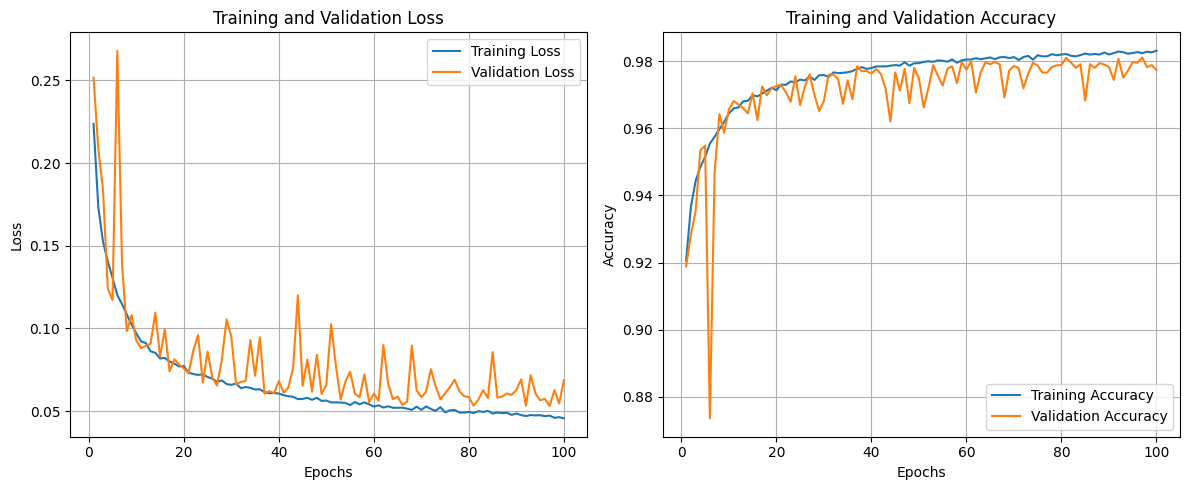

In [13]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [14]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


461/461 [==============================] - 1s 1ms/step


In [15]:
y_test

,fake,real
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,0,1
14733,0,1
14734,1,0


In [16]:
y_ture=np.argmax(y_test.values, axis=1)


In [17]:
y_ture

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

Test f1_score : 86.09%


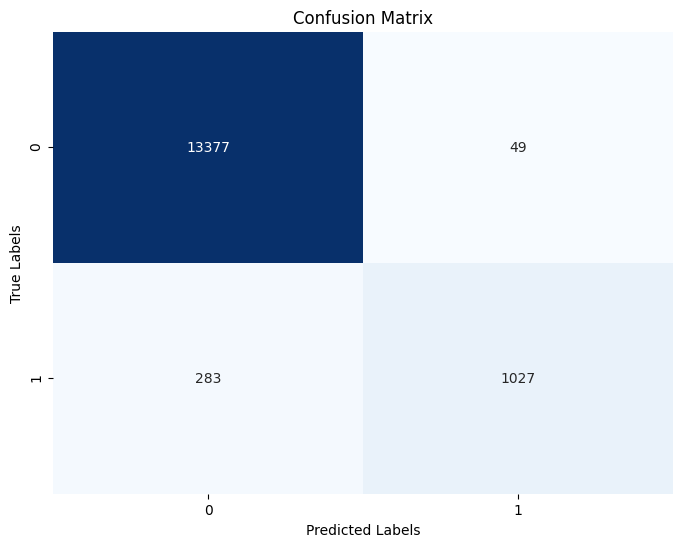

In [18]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred_classes

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [20]:
y_test

,fake,real
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,0,1
14733,0,1
14734,1,0


# eraly stopping

In [21]:

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 98, 128)           512       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 49, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                401472    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 402,114
Trainable params: 402,114
Non-trainable params: 0
________________________________________________

Epoch 1/100
1843/1843 [==============================] - 10s 5ms/step - loss: 0.2282 - accuracy: 0.9199 - val_loss: 0.1957 - val_accuracy: 0.9228
Epoch 2/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1722 - accuracy: 0.9366 - val_loss: 0.1498 - val_accuracy: 0.9431
Epoch 3/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1521 - accuracy: 0.9441 - val_loss: 0.1358 - val_accuracy: 0.9497
Epoch 4/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1373 - accuracy: 0.9493 - val_loss: 0.1443 - val_accuracy: 0.9479
Epoch 5/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1297 - accuracy: 0.9512 - val_loss: 0.1273 - val_accuracy: 0.9513
Epoch 6/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1207 - accuracy: 0.9546 - val_loss: 0.1142 - val_accuracy: 0.9568
Epoch 7/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1132 - accuracy: 0.9575 - val_loss: 0.1021 - val_a

In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.0669 - accuracy: 0.9798 - 1s/epoch - 2ms/step
Test Accuracy: 97.98%


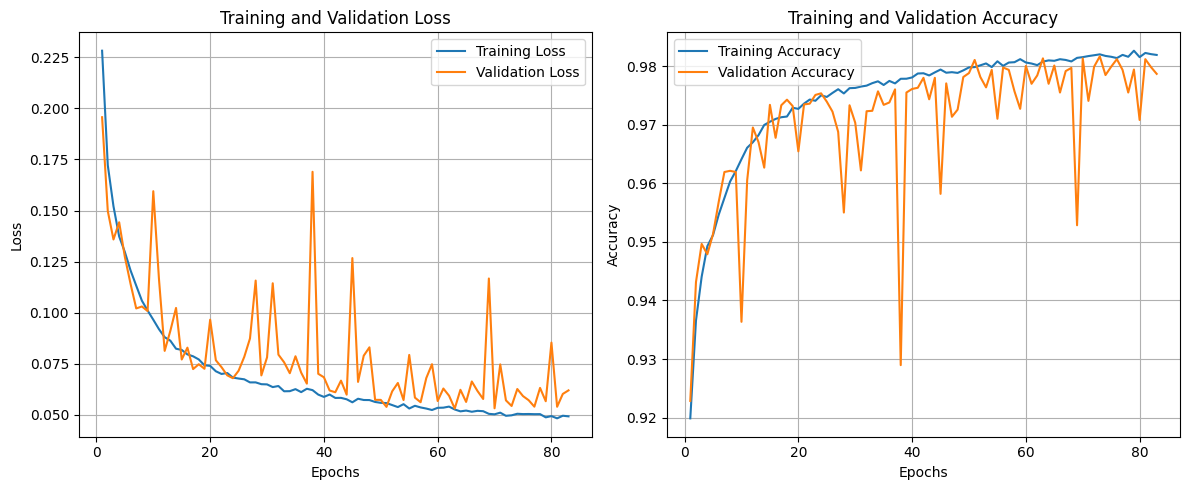

In [23]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 1ms/step
Test f1_score : 88.04%


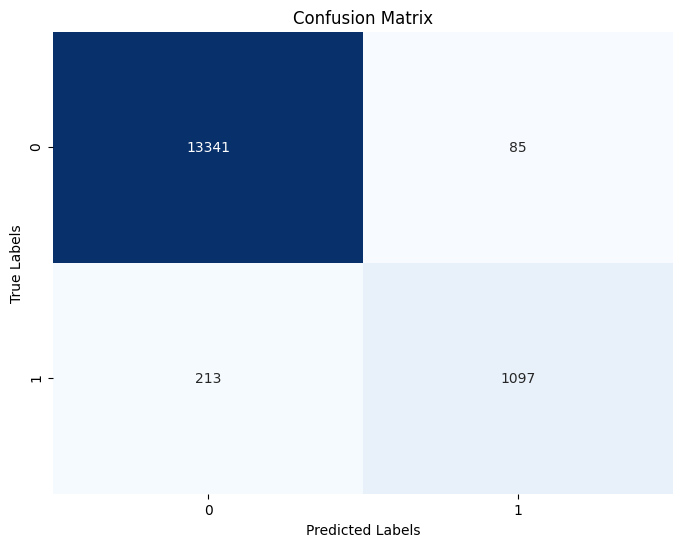

In [24]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()